<h1 align="center">Assignment</h1>
<h3 align="center">Faisal Akhtar</h3>
<h3 align="center">Roll No.: 17/1409</h3>
<h3 align="center">Machine Learning - B.Sc. Hons Computer Science - Vth Semester</h4>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from scipy import stats

In [2]:
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("../input/boston-housing.csv", header=None, delimiter=r"\s+", names=column_names)
print("\n\nData loaded\n\n")



Data loaded




In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<h4>Preprocessing</h4>

In [5]:
data = pd.DataFrame(np.c_[data['RM'],data['AGE'],data['MEDV']], columns = ['RM', 'AGE', 'MEDV'])

# Check null values
print("\n\nCheck null values\n",data.isnull().sum())



Check null values
 RM      0
AGE     0
MEDV    0
dtype: int64


No null values found...Moving on

In [6]:
# Discovering outliers by Z-Score
ZScore = np.abs(stats.zscore(data))
print("\n\nChecking where outliers are less than the ZScore")
print("ZScore > 1\n",np.where(ZScore > 1)[0],"\n",np.where(ZScore > 1)[1],"\n")
print("ZScore > 2\n",np.where(ZScore > 2)[0],"\n",np.where(ZScore > 2)[1],"\n")
print("ZScore > 3\n",np.where(ZScore > 3)[0],"\n",np.where(ZScore > 3)[1],"\n")



Checking where outliers are less than the ZScore
ZScore > 1
 [  2   2   3   3   4   4   8  12  16  18  18  20  20  23  30  31  32  33
  34  38  39  40  40  40  41  42  43  44  45  46  48  52  53  55  55  55
  56  58  64  64  65  66  67  68  69  70  71  72  73  74  79  80  82  88
  89  93  97  97  98  98  98  99  99 105 108 123 128 130 131 132 134 135
 137 138 138 139 141 141 142 142 143 143 144 144 144 145 146 147 148 150
 151 151 152 153 156 156 157 157 158 159 161 161 162 162 162 163 163 166
 166 171 172 175 179 180 180 181 182 182 183 186 186 187 188 189 189 189
 190 190 191 192 192 192 193 194 195 195 195 196 196 196 197 197 198 198
 198 199 199 200 200 200 201 202 202 202 203 203 203 204 204 204 205 209
 209 211 213 214 214 224 224 225 225 226 226 227 228 228 228 229 231 232
 232 233 233 237 238 243 246 249 250 251 252 253 253 253 254 255 256 256
 256 257 257 258 258 258 259 260 260 261 261 262 262 263 264 264 265 266
 267 267 268 268 271 273 273 274 274 275 276 276 277 277 278 

Selecting ZScore 3 to remove outliers

In [7]:
data_o = data[(ZScore<3).all(axis=1)]
print ("Shape before removing outliers : ",np.shape(data),"\nShape after removing outliers : ",np.shape(data_o))

Shape before removing outliers :  (506, 3) 
Shape after removing outliers :  (498, 3)


<h4>Preparing the data for training</h4>
whrere X is input data and Y is output data

In [8]:
X = pd.DataFrame(np.c_[data_o['RM'],data_o['AGE']], columns = ['RM', 'AGE'])
Y = pd.DataFrame(np.c_[data_o['MEDV']], columns = ['MEDV'])
print("\n\nX =\n",X.head(5))
print("\n\nY =\n",Y.head(5))



X =
       RM   AGE
0  6.575  65.2
1  6.421  78.9
2  7.185  61.1
3  6.998  45.8
4  7.147  54.2


Y =
    MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


<h4>Splitting dataset in Training sets and Test sets</h4>
Where 75% data is for training and 25% is for testing

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)
print("X_train.shape : ", X_train.shape, "\tX_test.shape", X_test.shape)
print("Y_train.shape : ", Y_train.shape, "\tY_train.shape", Y_train.shape)

X_train.shape :  (373, 2) 	X_test.shape (125, 2)
Y_train.shape :  (373, 1) 	Y_train.shape (373, 1)


<h4>Linear Regression</h4>
Fitting Linear regression model to training model

In [10]:
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train, Y_train)

<h4>Model Analysis</h4>

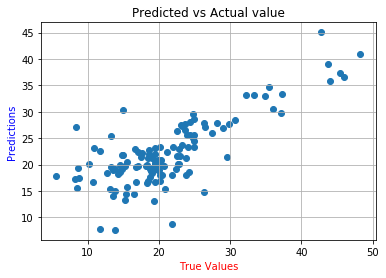

In [11]:
predictions = lin_model.predict(X_test)

# Scatter Plot
plt.scatter(Y_test, predictions)
plt.xlabel("True Values",color='red')
plt.ylabel("Predictions",color='blue')
plt.title("Predicted vs Actual value")
plt.grid(True)
plt.show()


<h4>The coefficient of determination R^2 of the prediction</h4>

In [12]:
print(lin_model.score(X_test,Y_test))

0.5925746602474407
